## Introduction



* Date - daily readings between 2015 and 2020

* PM2.5 - Particulate Matter 2.5-micrometer in ug / m3

* PM10 - Particulate Matter 10-micrometer in ug / m3

* NO - Nitric Oxide in ug / m3

* NO2 - Nitric Dioxide in ug / m3

* NOx - Any Nitric x-oxide in ppb

* NH3 - Ammonia in ug / m3

* CO - Carbon Monoxide in mg / m3

* SO2 - Sulphur Dioxide in ug / m3

* O3 - Ozone in ug / m3

* Benzene - Benzene in ug / m3

* Toluene - Toluene in ug / m3

* Xylene - Xylene in ug / m3

* AQI - Air Quality Index 

* AQI Bucket - Air Quality Index Bucket (ranging from 'very poor' to 'good')

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import os, sys 
import sqlite3


import matplotlib.pyplot as plt
import numpy as np

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
#import plotly.offline as offline 
#offline.init_notebook_mode(connected=True)

#load data 
india_air_data = pd.read_csv("city_day.csv")
india_air_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
india_air_data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
india_air_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
india_air_data['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
#data description 
india_air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
india_air_data.shape

(29531, 16)

In [ ]:
#Basic Stats
print(india_air_data['City'].nunique())
print(india_air_data['City'].unique())

26
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [ ]:
city_readings = india_air_data['City'].value_counts().to_frame().reset_index().rename(columns={'index':'City Name', 'City':'No. of readings'})
city_readings['%'] = (100* city_readings['No. of readings']/city_readings['No. of readings'].sum()).round(0)
city_readings

,City Name,No. of readings,%
0,Lucknow,2009,7.0
1,Ahmedabad,2009,7.0
2,Chennai,2009,7.0
3,Bengaluru,2009,7.0
4,Mumbai,2009,7.0
5,Delhi,2009,7.0
6,Hyderabad,2006,7.0
7,Patna,1858,6.0
8,Gurugram,1679,6.0
9,Visakhapatnam,1462,5.0


In [ ]:
#Number of readings per year 
india_air_data['Date'] = pd.to_datetime(india_air_data['Date'])
annual_readings = india_air_data.Date.dt.year.value_counts().to_frame().reset_index().rename(columns={'index':'Year', 'Date':'No. of readings'})
annual_readings['%'] = (100* annual_readings['No. of readings']/annual_readings['No. of readings'].sum()).round(0)
annual_readings


,Year,No. of readings,%
0,2019,7446,25.0
1,2018,6471,22.0
2,2017,4689,16.0
3,2020,4646,16.0
4,2016,3478,12.0
5,2015,2801,9.0


In [ ]:
#general trend for numeric data
pollutant_columns = india_air_data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
pollutant_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [ ]:
#clean data 
missing_values_count = india_air_data.isnull().sum()
total_cells = np.product(india_air_data.shape)
total_missing = missing_values_count.sum()
percent_missing_vals = ((total_missing/total_cells)*100).round(2)
print(missing_values_count[:])
print('Overall percentage of missing values: ', percent_missing_vals)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
Overall percentage of missing values:  18.73


In [ ]:
#Replace the missing values for numerical columns with mean

india_air_data['PM2.5'].fillna(india_air_data['PM2.5'].mean().round(2),inplace = True )
india_air_data['PM10'].fillna(india_air_data['PM10'].mean().round(2),inplace = True )
india_air_data['NO'].fillna(india_air_data['NO'].mean().round(2),inplace = True )
india_air_data['NO2'].fillna(india_air_data['NO2'].mean().round(2),inplace = True )
india_air_data['NOx'].fillna(india_air_data['NOx'].mean().round(2),inplace = True )
india_air_data['NH3'].fillna(india_air_data['NH3'].mean().round(2),inplace = True )
india_air_data['CO'].fillna(india_air_data['CO'].mean().round(2),inplace = True )
india_air_data['SO2'].fillna(india_air_data['SO2'].mean().round(2),inplace = True )
india_air_data['O3'].fillna(india_air_data['O3'].mean().round(2),inplace = True )
india_air_data['Benzene'].fillna(india_air_data['Benzene'].mean().round(2),inplace = True )
india_air_data['Toluene'].fillna(india_air_data['Toluene'].mean().round(2),inplace = True )
india_air_data['Xylene'].fillna(india_air_data['Xylene'].mean().round(2),inplace = True )
india_air_data['AQI'].fillna(india_air_data['AQI'].mean().round(2),inplace = True )

In [ ]:
india_air_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.45,118.13,0.92,18.22,17.15,23.48,0.92,27.64,133.36,0.00,0.02,0.00,166.46,NaN
1,Ahmedabad,2015-01-02,67.45,118.13,0.97,15.69,16.46,23.48,0.97,24.55,34.06,3.68,5.50,3.77,166.46,NaN
2,Ahmedabad,2015-01-03,67.45,118.13,17.40,19.30,29.70,23.48,17.40,29.07,30.70,6.80,16.40,2.25,166.46,NaN
3,Ahmedabad,2015-01-04,67.45,118.13,1.70,18.48,17.97,23.48,1.70,18.59,36.08,4.43,10.14,1.00,166.46,NaN
4,Ahmedabad,2015-01-05,67.45,118.13,22.10,21.42,37.76,23.48,22.10,39.33,39.31,7.01,18.89,2.78,166.46,NaN


In [ ]:
india_air_data['AQI_Bucket'].isnull().sum()

4681

In total, there are 4,681 missing descriptions in the 'AQI Bucket' column. Let's populate the missing rows in accordance with the score system implemented. 

AQI Score System: -
* Good (0-50)
* Satisfactory (51-100)
* Moderate (101-200)
* Poor (201-300)
* Very poor (301-400)
* Severe (401-500)

In [ ]:
india_air_data.loc[(india_air_data['AQI'] >= 0) & (india_air_data['AQI'] <= 50), 'AQI_Bucket'] = 'Good'
india_air_data.loc[(india_air_data['AQI'] >= 51) & (india_air_data['AQI'] <= 100), 'AQI_Bucket'] = 'Satisfactory'
india_air_data.loc[(india_air_data['AQI'] >= 101) & (india_air_data['AQI'] <= 200), 'AQI_Bucket'] = 'Moderate'
india_air_data.loc[(india_air_data['AQI'] >= 201) & (india_air_data['AQI'] <= 300), 'AQI_Bucket'] = 'Poor'
india_air_data.loc[(india_air_data['AQI'] >= 301) & (india_air_data['AQI'] <= 400), 'AQI_Bucket'] = 'Very poor'
india_air_data.loc[(india_air_data['AQI'] >= 401) & (india_air_data['AQI'] <= 500), 'AQI_Bucket'] = 'Severe'

In [ ]:
india_air_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.45,118.13,0.92,18.22,17.15,23.48,0.92,27.64,133.36,0.00,0.02,0.00,166.46,Moderate
1,Ahmedabad,2015-01-02,67.45,118.13,0.97,15.69,16.46,23.48,0.97,24.55,34.06,3.68,5.50,3.77,166.46,Moderate
2,Ahmedabad,2015-01-03,67.45,118.13,17.40,19.30,29.70,23.48,17.40,29.07,30.70,6.80,16.40,2.25,166.46,Moderate
3,Ahmedabad,2015-01-04,67.45,118.13,1.70,18.48,17.97,23.48,1.70,18.59,36.08,4.43,10.14,1.00,166.46,Moderate
4,Ahmedabad,2015-01-05,67.45,118.13,22.10,21.42,37.76,23.48,22.10,39.33,39.31,7.01,18.89,2.78,166.46,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.00,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.00,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.00,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.00,Satisfactory


In [ ]:
#check if null values filled correctly 
india_air_data['AQI_Bucket'].isnull().sum()

0

In [ ]:
#average readings by city 
avg_readings = india_air_data.groupby('City').mean().reset_index().round(2)
avg_readings

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,67.73,117.41,20.96,49.81,42.92,23.48,16.15,42.28,37.56,4.90,23.16,3.96,356.14
1,Aizawl,18.02,24.19,9.41,0.39,12.61,22.31,0.28,7.38,6.16,8.94,10.04,3.07,37.10
2,Amaravati,39.61,78.78,5.20,22.54,16.36,12.65,0.79,14.28,37.91,0.76,2.42,1.57,103.53
3,Amritsar,56.72,115.35,18.64,18.88,34.86,14.69,0.66,9.03,23.55,4.04,4.02,6.61,123.54
4,Bengaluru,38.12,89.49,9.43,28.00,19.74,22.13,1.84,5.55,32.98,3.23,4.94,3.07,97.87
5,Bhopal,50.60,119.29,7.37,31.26,22.74,19.21,0.92,13.11,59.06,3.28,8.70,3.07,134.11
6,Brajrajnagar,64.73,123.09,17.37,19.52,25.99,33.48,1.87,10.76,20.47,4.55,8.70,3.07,154.16
7,Chandigarh,42.43,85.66,10.59,11.83,15.29,30.54,0.63,10.16,20.05,5.07,1.40,2.62,97.65
8,Chennai,51.42,109.82,9.34,17.07,17.93,54.26,1.08,8.00,32.49,1.93,3.36,3.07,117.74
9,Coimbatore,29.95,39.44,8.83,28.78,30.90,14.01,0.96,8.65,28.88,0.03,0.11,3.07,83.19


In [ ]:
avg_readings.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,26.0,57.728462,27.508158,18.02,38.6950,53.030,64.6900,117.15
PM10,26.0,104.586538,42.134184,24.19,80.5000,112.680,119.2225,228.41
NO,26.0,17.971923,13.924665,3.85,9.3575,14.970,22.2650,71.10
NO2,26.0,24.084231,12.566666,0.39,14.1975,23.170,32.0925,50.76
NOx,26.0,31.056923,16.472431,4.33,19.5450,28.080,41.9150,68.41
NH3,26.0,20.751923,10.722767,6.75,13.0800,19.960,23.6225,54.26
CO,26.0,1.697692,2.994228,0.28,0.7500,0.965,1.6275,16.15
SO2,26.0,13.325000,8.294535,3.46,8.7025,10.460,14.7575,42.28
O3,26.0,31.555000,11.769350,3.82,26.0375,33.300,36.8700,59.06
Benzene,26.0,4.471154,6.613644,0.03,1.6525,3.280,4.0400,34.69


In [ ]:
# avg readings for PM2.5 across all cities (pie chart)
trace1=go.Pie(labels=avg_readings['City'], values=avg_readings['PM2.5'].round(2),
             title='Average PM2.5 readings by City')
fig=go.Figure(trace1)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for PM10 across all cities (pie chart)
trace2=go.Pie(labels=avg_readings['City'], values=avg_readings['PM10'].round(2),
             title='Average PM10 readings by City')
fig=go.Figure(trace2)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for NO across all cities (pie chart)
trace3=go.Pie(labels=avg_readings['City'], values=avg_readings['NO'].round(2),
             title='Average NO readings by City')
fig=go.Figure(trace3)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for NO2 across all cities (pie chart)
trace4=go.Pie(labels=avg_readings['City'], values=avg_readings['NO2'],
             title='Average NO2 readings by City')
fig=go.Figure(trace4)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for NOx across all cities (pie chart)
trace5=go.Pie(labels=avg_readings['City'], values=avg_readings['NOx'],
             title='Average NOx readings by City')
fig=go.Figure(trace5)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for NH3 across all cities (pie chart)
trace6=go.Pie(labels=avg_readings['City'], values=avg_readings['NH3'],
             title='Average NH3 readings by City')
fig=go.Figure(trace6)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for CO across all cities (pie chart)
trace7=go.Pie(labels=avg_readings['City'], values=avg_readings['CO'].round(2),
             title='Average CO readings by City')
fig=go.Figure(trace7)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for SO2 across all cities (pie chart)
trace8=go.Pie(labels=avg_readings['City'], values=avg_readings['SO2'],
             title='Average SO2 readings by City')
fig=go.Figure(trace8)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for O3 across all cities (pie chart)
trace9=go.Pie(labels=avg_readings['City'], values=avg_readings['O3'],
             title='Average O3 readings by City')
fig=go.Figure(trace9)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for Benzene across all cities (pie chart)
trace10=go.Pie(labels=avg_readings['City'], values=avg_readings['Benzene'].round(2),
             title='Average Benzene readings by City')
fig=go.Figure(trace10)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for Toluene across all cities (pie chart)
trace11=go.Pie(labels=avg_readings['City'], values=avg_readings['Toluene'],
             title='Average Toluene readings by City')
fig=go.Figure(trace11)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for Xylene across all cities (pie chart)
trace12=go.Pie(labels=avg_readings['City'], values=avg_readings['Xylene'],
             title='Average Xylene readings by City')
fig=go.Figure(trace12)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
# avg readings for AQI across all cities (pie chart)
trace13=go.Pie(labels=avg_readings['City'], values=avg_readings['AQI'],
             title='Average AQI readings by City')
fig=go.Figure(trace13)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [ ]:
avg_readings.round(2).head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,67.73,117.41,20.96,49.81,42.92,23.48,16.15,42.28,37.56,4.90,23.16,3.96,356.14
1,Aizawl,18.02,24.19,9.41,0.39,12.61,22.31,0.28,7.38,6.16,8.94,10.04,3.07,37.10
2,Amaravati,39.61,78.78,5.20,22.54,16.36,12.65,0.79,14.28,37.91,0.76,2.42,1.57,103.53
3,Amritsar,56.72,115.35,18.64,18.88,34.86,14.69,0.66,9.03,23.55,4.04,4.02,6.61,123.54
4,Bengaluru,38.12,89.49,9.43,28.00,19.74,22.13,1.84,5.55,32.98,3.23,4.94,3.07,97.87


In [ ]:
MaxVals=avg_readings[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI']].dropna().idxmax()
MaxVals

PM2.5      10
PM10       10
NO         17
NO2        10
NOx        17
NH3         8
CO          0
SO2         0
O3          5
Benzene    22
Toluene    22
Xylene      3
AQI         0
dtype: int64

In [ ]:
MaxCities=avg_readings.iloc[[10,10,17,10,17,8,0,0,5,22,22,3,0], [0]].reset_index().rename(columns={'City':'City, Max. Readings'})
MaxCities

,index,"City, Max. Readings"
0,10,Delhi
1,10,Delhi
2,17,Kochi
3,10,Delhi
4,17,Kochi
5,8,Chennai
6,0,Ahmedabad
7,0,Ahmedabad
8,5,Bhopal
9,22,Shillong


In [ ]:
MinVals=avg_readings[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI']].dropna().idxmin()
MinVals


PM2.5       1
PM10        1
NO         24
NO2         1
NOx        22
NH3        22
CO          1
SO2        11
O3         17
Benzene     9
Toluene    17
Xylene     11
AQI         1
dtype: int64

In [ ]:
MinCities=avg_readings.iloc[[20,19,22,1,16,0,22,11,11,5,5,1,1], [0]].reset_index().rename(columns={'City':'City, Min. Readings'})
MinCities

,index,"City, Min. Readings"
0,20,Mumbai
1,19,Lucknow
2,22,Shillong
3,1,Aizawl
4,16,Jorapokhar
5,0,Ahmedabad
6,22,Shillong
7,11,Ernakulam
8,11,Ernakulam
9,5,Bhopal


In [ ]:
pollutants=avg_readings.columns.to_frame().drop(labels='City', axis=0).reset_index()
pollutants

,index,0
0,PM2.5,PM2.5
1,PM10,PM10
2,NO,NO
3,NO2,NO2
4,NOx,NOx
5,NH3,NH3
6,CO,CO
7,SO2,SO2
8,O3,O3
9,Benzene,Benzene


In [ ]:
summ_max_min=pd.concat([pollutants, MaxCities, MinCities], axis=1).drop(columns=['index'])
summ_max_min.rename(columns={0:'Pollutant'} )

,Pollutant,"City, Max. Readings","City, Min. Readings"
0,PM2.5,Delhi,Mumbai
1,PM10,Delhi,Lucknow
2,NO,Kochi,Shillong
3,NO2,Delhi,Aizawl
4,NOx,Kochi,Jorapokhar
5,NH3,Chennai,Ahmedabad
6,CO,Ahmedabad,Shillong
7,SO2,Ahmedabad,Ernakulam
8,O3,Bhopal,Ernakulam
9,Benzene,Shillong,Bhopal


In [ ]:
#avg co readings in order of high to low by city 
avg_co_df=avg_readings[['City', 'CO']].sort_values('CO', ascending=False)
avg_co_df

,City,CO
0,Ahmedabad,16.15
19,Lucknow,2.13
10,Delhi,1.98
23,Talcher,1.91
6,Brajrajnagar,1.87
4,Bengaluru,1.84
11,Ernakulam,1.64
21,Patna,1.59
16,Jorapokhar,1.36
12,Gurugram,1.32


In [ ]:
#avg so2 readings in order of high to low by city 
avg_so2_df=avg_readings[['City', 'SO2']].sort_values('SO2', ascending=False)
avg_so2_df

,City,SO2
0,Ahmedabad,42.28
16,Jorapokhar,27.91
23,Talcher,25.60
21,Patna,21.29
17,Kochi,17.60
10,Delhi,15.83
20,Mumbai,14.79
13,Guwahati,14.66
2,Amaravati,14.28
5,Bhopal,13.11


In [ ]:
city_annual_avg=india_air_data.copy()
city_annual_avg['Date'] = pd.to_datetime(city_annual_avg['Date'])
city_annual_avg=city_annual_avg.groupby(['City', city_annual_avg.Date.dt.year]).mean().reset_index().rename(columns={'Date':'Year'})
city_annual_avg

,City,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015,76.479315,118.130000,14.244055,22.435068,33.122329,23.480000,11.725699,29.207671,31.872603,4.413178,11.816795,3.251151,270.572384
1,Ahmedabad,2016,65.759836,118.130000,16.654399,23.916175,30.713060,23.480000,6.566639,15.638060,29.917650,2.461011,6.401967,2.120492,212.397650
2,Ahmedabad,2017,71.711288,118.130000,19.921479,37.441507,38.070164,23.480000,7.329699,30.038438,37.943808,5.170932,15.022795,4.319397,240.622356
3,Ahmedabad,2018,74.649123,118.130000,33.158521,84.628575,60.277890,23.480000,33.074575,69.468767,38.786932,8.078493,37.385151,6.019370,612.273096
4,Ahmedabad,2019,62.206110,119.383945,25.993068,90.062959,62.681671,23.480000,25.741233,71.195945,46.355836,5.065589,41.045726,5.090137,503.890356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Visakhapatnam,2016,45.718587,88.915489,16.692120,41.956957,32.827065,13.706141,1.127283,21.364946,43.233641,6.144076,10.597391,6.710815,109.749022
99,Visakhapatnam,2017,62.346740,113.471014,15.426027,30.628767,12.335781,15.574329,0.512959,12.528521,41.515370,1.899260,3.629178,1.186493,156.281534
100,Visakhapatnam,2018,51.365507,116.734904,12.708877,38.365178,30.652027,12.704740,0.802603,11.423699,38.049699,4.729233,11.043288,3.210932,127.482027
101,Visakhapatnam,2019,48.038466,115.358904,14.056795,37.482767,31.397890,10.685808,0.901836,13.007836,33.051205,4.114548,9.099753,2.532986,126.271342


In [ ]:
fig=px.bar(city_annual_avg, x='Year', y='CO', color='City', barmode='group',title='Carbon Monoxide (CO) average readings for each city between 2015 - 2020')
fig.show()

In [ ]:
fig=px.bar(city_annual_avg, x='City', y='CO' , color='Year', title='Annual Average Carbon Monoxide (CO) Readings for each City, 2015-2020')
fig.show()

In [ ]:
fig=px.bar(city_annual_avg, x='Year', y='SO2', color='City', barmode='group', title='Sulfur Dioxide (SO2) average readings for each city between 2015 - 2020')
fig.show()

In [ ]:
fig=px.bar(city_annual_avg, x='City', y='SO2' , color='Year', title='Annual Average Sulfur Dioxide (SO2) Readings for each City, 2015-2020')
fig.show()

In [ ]:
trace5=go.Box(x=city_annual_avg['PM2.5'], name='PM2.5')
d5=[trace5]
layout=go.Layout(title='Range of PM2.5 readings')
fig=go.Figure(data=d5, layout=layout)
fig.show()

In [ ]:
fig=px.bar(city_annual_avg, x='Year', y='PM2.5', color='City', barmode='group',title='PM2.5 average readings for each city between 2015 - 2020')
fig.show()

In [ ]:
fig=px.bar(city_annual_avg, x='City', y='PM2.5' , color='Year', title='Annual Average PM2.5 Readings for each City, 2015-2020')
fig.show()

In [ ]:
fig=px.bar(city_annual_avg, x='Year', y='NO2', color='City', barmode='group', title='NO2 average readings for each city between 2015 - 2020')
fig.show()

In [ ]:
trace4=go.Box(x=city_annual_avg['NO2'], name='NO2')
d4=[trace4]
layout=go.Layout(title='Range of NO2 readings')
fig=go.Figure(data=d4, layout=layout)
fig.show()

In [ ]:
fig=px.bar(city_annual_avg, x='City', y='NO2' , color='Year', title='Annual Average NO2 Readings for each City')
fig.show()

The AQI is measured accordingly:-

* Good (0-50)
* Satisfactory (51-100)
* Moderate (101-200)
* Poor (201-300)
* Very poor (301-400)
* Severe (401-500)

In [ ]:
aqi_avg_df=city_annual_avg.copy().drop(columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene'])
aqi_avg_df

,City,Year,AQI
0,Ahmedabad,2015,270.572384
1,Ahmedabad,2016,212.397650
2,Ahmedabad,2017,240.622356
3,Ahmedabad,2018,612.273096
4,Ahmedabad,2019,503.890356
...,...,...,...
98,Visakhapatnam,2016,109.749022
99,Visakhapatnam,2017,156.281534
100,Visakhapatnam,2018,127.482027
101,Visakhapatnam,2019,126.271342


In [ ]:
aqi_avg_df['Average_AQI']=aqi_avg_df['AQI'].mean()
aqi_avg_df

,City,Year,AQI,Average_AQI
0,Ahmedabad,2015,270.572384,158.681593
1,Ahmedabad,2016,212.397650,158.681593
2,Ahmedabad,2017,240.622356,158.681593
3,Ahmedabad,2018,612.273096,158.681593
4,Ahmedabad,2019,503.890356,158.681593
...,...,...,...,...
98,Visakhapatnam,2016,109.749022,158.681593
99,Visakhapatnam,2017,156.281534,158.681593
100,Visakhapatnam,2018,127.482027,158.681593
101,Visakhapatnam,2019,126.271342,158.681593


In [ ]:
fig=px.bar(aqi_avg_df, x='Year', y='AQI', color='City', barmode='group', title='AQI for each city between 2015 - 2020')
l=px.line(aqi_avg_df, x='Year', y='Average_AQI').update_traces(line_color="black", name='Average AQI', showlegend=True)
fig.add_traces(l.data)
fig.show()

In [ ]:
aqi_bucket_df=india_air_data[['City', 'Date', 'AQI_Bucket']] 
aqi_bucket_df

,City,Date,AQI_Bucket
0,Ahmedabad,2015-01-01,Moderate
1,Ahmedabad,2015-01-02,Moderate
2,Ahmedabad,2015-01-03,Moderate
3,Ahmedabad,2015-01-04,Moderate
4,Ahmedabad,2015-01-05,Moderate
...,...,...,...
29526,Visakhapatnam,2020-06-27,Good
29527,Visakhapatnam,2020-06-28,Satisfactory
29528,Visakhapatnam,2020-06-29,Satisfactory
29529,Visakhapatnam,2020-06-30,Satisfactory


In [ ]:
aqi_bucket_df_by_yr = aqi_bucket_df.groupby(['City', aqi_bucket_df.Date.dt.year, 'AQI_Bucket']).count().rename(columns={'Date':'Quantity'}).reset_index()
aqi_bucket_df_by_yr = aqi_bucket_df_by_yr.rename(columns={'Date':'Year'})
aqi_bucket_df_by_yr

,City,Year,AQI_Bucket,Quantity
0,Ahmedabad,2015,Good,1
1,Ahmedabad,2015,Moderate,174
2,Ahmedabad,2015,Poor,74
3,Ahmedabad,2015,Satisfactory,8
4,Ahmedabad,2015,Severe,51
...,...,...,...,...
452,Visakhapatnam,2020,Good,29
453,Visakhapatnam,2020,Moderate,47
454,Visakhapatnam,2020,Poor,1
455,Visakhapatnam,2020,Satisfactory,105


In [ ]:
fig=px.bar(aqi_bucket_df_by_yr, x='City', y='Quantity' , color='AQI_Bucket', title='Annual Air Quality Index by City, 2015-2020')
fig.show()

In [ ]:
fig=px.histogram(aqi_bucket_df_by_yr, x='AQI_Bucket', title='AQI Rating Histogram', color_discrete_sequence=['indianred'])
fig.show()

### 3.6 Correlations

In [ ]:
#Data correlations
city_annual_avg.corr().style.background_gradient(cmap='Oranges')

,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Year,1.000000,-0.445202,-0.302519,-0.025523,-0.149706,-0.055147,-0.280496,-0.105266,0.019277,-0.004326,0.120859,0.137301,0.049276,-0.315253
PM2.5,-0.445202,1.000000,0.703278,0.429849,0.407713,0.392225,0.306462,0.090017,0.159529,0.225417,-0.099351,0.104279,0.099959,0.665022
PM10,-0.302519,0.703278,1.000000,0.519555,0.440451,0.490705,0.394562,0.074290,0.236217,0.303025,-0.095899,0.169693,0.010973,0.549195
NO,-0.025523,0.429849,0.519555,1.000000,0.392842,0.785856,0.154110,0.153612,0.238570,-0.063059,-0.060927,0.081972,0.011330,0.432370
NO2,-0.149706,0.407713,0.440451,0.392842,1.000000,0.542134,0.213802,0.542621,0.515071,0.485991,-0.054782,0.401761,0.164479,0.700016
NOx,-0.055147,0.392225,0.490705,0.785856,0.542134,1.000000,0.101548,0.243446,0.270118,0.073960,-0.081248,0.141128,-0.008703,0.481705
NH3,-0.280496,0.306462,0.394562,0.154110,0.213802,0.101548,1.000000,0.046285,-0.055518,0.151477,-0.128051,-0.044873,-0.037880,0.217978
CO,-0.105266,0.090017,0.074290,0.153612,0.542621,0.243446,0.046285,1.000000,0.765527,0.083850,0.074190,0.515130,0.209081,0.779918
SO2,0.019277,0.159529,0.236217,0.238570,0.515071,0.270118,-0.055518,0.765527,1.000000,0.241543,0.015111,0.518427,0.370662,0.701929
O3,-0.004326,0.225417,0.303025,-0.063059,0.485991,0.073960,0.151477,0.083850,0.241543,1.000000,-0.082838,0.193463,0.111593,0.249714


r-values greater than 0.7 indicate a strong correlation. Therefore, it would be reasonable to say there is a strong correlation between the following:-

* AQI : NO2 (0.78)
* SO2 : CO (0.76)
* NOx : NO (0.75)
* AQI : CO (0.73)
* AQI : SO2 (0.72)
* AQI : PM2.5 (0.71) 

Without considering the AQI, the pollutants with a strong correlation are SO2 and CO, and NOx and NO.

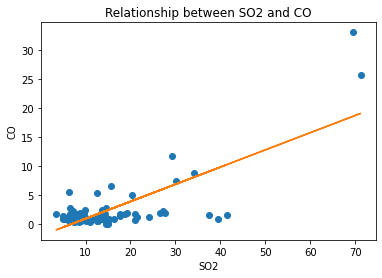

In [ ]:
x=city_annual_avg['SO2']
y=city_annual_avg['CO']
plt.title("Relationship between SO2 and CO")
plt.xlabel("SO2")
plt.ylabel("CO")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

SO2 and CO have an r-value of 0.76 and therefore have a strong, positive correlation as shown above. 

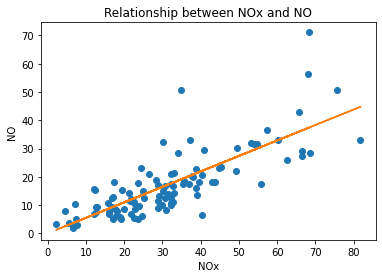

In [ ]:
x=city_annual_avg['NOx']
y=city_annual_avg['NO']
plt.title("Relationship between NOx and NO")
plt.xlabel("NOx")
plt.ylabel("NO")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

In [1]:
from tkinter import *
import requests
from bs4 import BeautifulSoup


# link for extract html data

def getdata(url):
	r = requests.get(url)
	return r.text


def airinfo():
	htmldata = getdata("https://weather.com/en-IN/forecast/air-quality/l/d9a46b04587bfde932f0406024823549c7a2cc72a186e05abca54190fb865cb3")
	soup = BeautifulSoup(htmldata, 'html.parser')
	res_data = soup.find(class_="DonutChart--innerValue--3_iFF AirQuality--extendedDialText--1kqIb").text
	air_data = soup.find_all(class_="DonutChart--innerValue--3_iFF AirQuality--pollutantDialText--2Q5Oh")
	air_data=[data.text for data in air_data]
	

	ar.set(res_data)
	o3.set(air_data[0])
	no2.set(air_data[1])
	so2.set(air_data[2])
	pm.set(air_data[3])
	pml.set(air_data[4])
	co.set(air_data[5])
	res = int(res_data)
	if res <= 50:
		remark = "Good"
		impact = "Minimal impact"
	elif res <= 100 and res > 51:
		remark = "Satisfactory"
		impact = "Minor breathing discomfort to sensitive people"
	elif res <= 200 and res >= 101:
		remark = "Moderate"
		impact = "Breathing discomfort to the people with lungs, asthma and heart diseases"
	elif res <= 400 and res >= 201:
		remark = "Very Poor"
		impact = "Breathing discomfort to most people on prolonged exposure"
	elif res <= 500 and res >= 401:
		remark = "Severe"
		impact = "Affects healthy people and seriously impacts those with existing diseases"
	res_remark.set(remark)
	res_imp.set(impact)


# object of tkinter
# and background set to grey
master = Tk()
master.configure(bg='light grey')

# Variable Classes in tkinter
air_data = StringVar()
ar = StringVar()
o3 = StringVar()
no2 = StringVar()
so2 = StringVar()
pm = StringVar()
pml = StringVar()
co = StringVar()
res_remark = StringVar()
res_imp = StringVar()


# Creating label for each information
# name using widget Label
Label(master, text="Air Quality : ",
	bg="light grey").grid(row=0, sticky=W)
Label(master, text="O3 (μg/m3) :",
	bg="light grey").grid(row=1, sticky=W)
Label(master, text="NO2 (μg/m3) :",
	bg="light grey").grid(row=2, sticky=W)
Label(master, text="SO2 (μg/m3) :",
	bg="light grey").grid(row=3, sticky=W)
Label(master, text="PM2.5 (μg/m3) :",
	bg="light grey").grid(row=4, sticky=W)
Label(master, text="PM10 (μg/m3) :",
	bg="light grey").grid(row=5, sticky=W)
Label(master, text="CO (μg/m3) :",
	bg="light grey").grid(row=6, sticky=W)

Label(master, text="Remark :",
	bg="light grey").grid(row=7, sticky=W)
Label(master, text="Possible Health Impacts :",
	bg="light grey").grid(row=8, sticky=W)


# Creating label for class variable
# name using widget Entry
Label(master, text="", textvariable=ar,
	bg="light grey").grid(
	row=0, column=1, sticky=W)
Label(master, text="", textvariable=o3,
	bg="light grey").grid(
	row=1, column=1, sticky=W)
Label(master, text="", textvariable=no2,
	bg="light grey").grid(
	row=2, column=1, sticky=W)
Label(master, text="", textvariable=so2,
	bg="light grey").grid(
	row=3, column=1, sticky=W)
Label(master, text="", textvariable=pm,
	bg="light grey").grid(
	row=4, column=1, sticky=W)
Label(master, text="", textvariable=pml,
	bg="light grey").grid(
	row=5, column=1, sticky=W)
Label(master, text="", textvariable=co,
	bg="light grey").grid(
	row=6, column=1, sticky=W)
Label(master, text="", textvariable=res_remark,
	bg="light grey").grid(row=7, column=1, sticky=W)
Label(master, text="", textvariable=res_imp,
	bg="light grey").grid(row=8, column=1, sticky=W)


# creating a button using the widget
b = Button(master, text="Check",
		command=airinfo, bg="Blue")
b.grid(row=0, column=2, columnspan=2,
	rowspan=2, padx=5, pady=5,)

mainloop()


History has shown us that reducing air pollution is a key component to protecting public health. During the industrial revolution, although there were many economic benefits, there was a severe impact on air quality from the increase in pollutants. Currently, a lot of the factors contributing to air pollution in our cities are due to sectors such as energy, urban planning, transport and agriculture. The findings from the data analysis should urge policy makers to implement tighter controls in India and for the global community to come together to innovate cleaner solutions.